In [1]:
import pandas as pd
import numpy as np

In [2]:
X_train = pd.read_csv("train.csv", index_col=0)
X_test = pd.read_csv("test.csv", index_col=0)

In [71]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
Y = X_train.pop("SalePrice")
Y = np.log1p(Y)

In [4]:
X_all = pd.concat([X_train, X_test], axis=0)

In [25]:
X_all.LotFrontage.count()
#pd.get_dummies(X_all.MSSubClass, prefix="MSSubClass")

2433

In [5]:
X_all.MSSubClass = X_all.MSSubClass.astype(str)
X_all_processed = pd.get_dummies(X_all)

In [29]:
X_all_processed.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [37]:
X_all_processed.isnull().sum().sort_values(ascending=False).head(10)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtFullBath      2
BsmtHalfBath      2
GarageCars        1
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
dtype: int64

In [6]:
X_all_processed_fillna = X_all_processed.fillna(X_all_processed.mean())

In [44]:
X_all_processed_fillna.columns[X_all_processed_fillna.dtypes != 'object']

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=304)

In [7]:
X_all_train = X_all_processed_fillna.loc[X_train.index]
X_all_test = X_all_processed_fillna.loc[X_test.index]

In [8]:
X_all_train.shape

(1460, 303)

In [9]:
X_all_test.shape

(1459, 303)

In [10]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score



In [13]:
X_all_train_values = X_all_train.values
X_all_test_values = X_all_test.values

In [89]:
alphas = np.logspace(-3, 2, 50)
test_scores = []
for alpha in alphas:
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(clf, X_all_train_values, Y, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

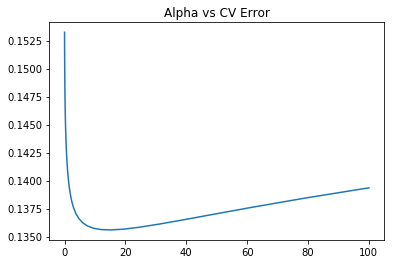

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(alphas, test_scores)
plt.title("Alpha vs CV Error");

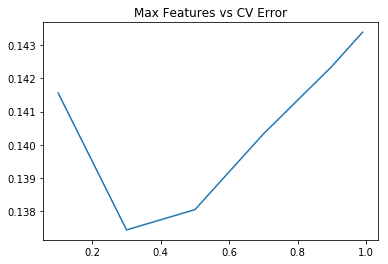

In [92]:
from sklearn.ensemble import RandomForestRegressor

max_features = [.1, .3, .5, .7, .9, .99]
test_scores = []
for max_feat in max_features:
    clf = RandomForestRegressor(n_estimators=200, max_features=max_feat)
    test_score = np.sqrt(-cross_val_score(clf, X_all_train_values, Y, cv=5, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
    
plt.plot(max_features, test_scores)
plt.title("Max Features vs CV Error");

In [93]:
ridge = Ridge(alpha=15)
rf = RandomForestRegressor(n_estimators=500, max_features=.3)

ridge.fit(X_all_train_values, Y)
rf.fit(X_all_train_values, Y)

Y_ridge = np.expm1(ridge.predict(X_all_test_values))
Y_rf = np.expm1(rf.predict(X_all_test_values))

Y_final = (Y_ridge + Y_rf)/2

In [95]:
Y_submission = pd.DataFrame(data={"Id": X_test.index, "SalePrice": Y_final})

In [97]:
Y_submission.to_csv('logistic_exp1.csv',index= False)

In [ ]:
#bagging

from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score

ridge_bagging = Ridge(alpha=15)

params = [1, 10, 15, 20, 25, 30, 40, 50, 60, 70, 100]
test_scores = []
for param in params:
    clf = BaggingRegressor(n_estimators=param)
    test_score = np.sqrt(-cross_val_score(clf, X_all_train_values, Y, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
    
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(params, test_scores)
plt.title("n_estimator vs CV Error");    
#在这里，我们用CV结果来测试不同的分类器个数对最后结果的影响。
#注意，我们在部署Bagging的时候，要把它的函数base_estimator里填上你的小分类器（ridge）

In [14]:
#boosting
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor

ridge = Ridge(alpha=15)
params = [10, 15, 20, 25, 30, 35, 40, 45, 50]
test_scores = []
for param in params:
    clf = BaggingRegressor(n_estimators=param, base_estimator=ridge)
    test_score = np.sqrt(-cross_val_score(clf, X_all_train_values, Y, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))



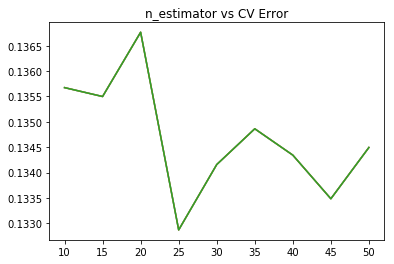

In [19]:
import matplotlib.pyplot as plt
plt.plot(params, test_scores)
plt.title("n_estimator vs CV Error");
plt.show()

In [24]:
clf = BaggingRegressor(n_estimators=25)
clf.fit(X_all_train_values, Y)
Y_predict = clf.predict(X_all_test_values)

In [26]:
Y_predict = np.expm1(Y_predict)

In [27]:
Y_predict

array([ 123110.7473706 ,  150915.79271589,  177323.58748071, ...,
        158515.22306592,  116094.60550596,  221571.56971485])

In [29]:
result = pd.DataFrame(data={"Id": X_test.index, "SalePrice": Y_predict})

In [30]:
result.to_csv('HousePrice2.csv',index= False)